Implement OR and AND gates using perceptron learning scheme.

In [ ]:
import numpy as np

print("For the AND gate ")
# Define the input data for the AND gate
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target output for the AND gate
target_output = np.array([[0], [0], [0], [1]])
# Define the learning rate and the number of iterations
learning_rate = 0.1
num_iterations = 10

# Define the activation function (step function)
def activation_function(x):
  return 1 if x >= 0 else 0

# Initialize the weights and the bias
weights = np.array([0.0, 0.0])
bias = 0.0

# Train the perceptron
for i in range(num_iterations):
  #print("\nIteration ", i)
  for j in range(len(input_data)):
    x = input_data[j]
    y = target_output[j]
    # Calculate the weighted sum of the inputs and the bias
    z = np.dot(x, weights)+bias
    #print("Z: ", z, end = " ")
    # Calculate the predicted output using the activation function
    _y = activation_function(z)
    #print("\nPredicted Output: ", _y)
    # Calculate the error
    error = y - _y
    # Update the weights and the bias
    weights = weights + learning_rate*error*x
    bias = bias + learning_rate*error
    #print("Updated weights:", weights, "Bias:", bias)

# Print learned weights
print("Learned Weights:", weights, "and bias:", bias)
# Test the perceptron
print("Output: ")
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for j in range(len(test_inputs)):
  x = test_inputs[j]
  y = target_output[j]
  z = np.dot(x, weights)+bias
  _y = activation_function(z)
  print("Predicted:", _y, "Desired", y)

print("\nFor the OR gate ")
  # Define the input data for the OR gate
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# Define the target output for the OR gate
target_output = np.array([[0], [1], [1], [1]])
# Define the learning rate and the number of iterations
learning_rate = 0.1
num_iterations = 10

# Define the activation function (step function)
def activation_function(x):
  return 1 if x >= 0 else 0

# Initialize the weights and the bias
weights = np.array([0.0, 0.0])
bias = 0.0

# Train the perceptron
for i in range(num_iterations):
  #print("\nIteration ", i)
  for j in range(len(input_data)):
    x = input_data[j]
    y = target_output[j]
    # Calculate the weighted sum of the inputs and the bias
    z = np.dot(x, weights)+bias
    #print("Z: ", z, end = " ")
    # Calculate the predicted output using the activation function
    _y = activation_function(z)
    #print("\nPredicted Output: ", _y)
    # Calculate the error
    error = y - _y
    # Update the weights and the bias
    weights = weights + learning_rate*error*x
    bias = bias + learning_rate*error
    #print("Updated weights:", weights, "Bias:", bias)

# Print learned weights
print("Learned Weights:", weights, "and bias:", bias)
# Test the perceptron
print("Output: ")
test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for j in range(len(test_inputs)):
  x = test_inputs[j]
  y = target_output[j]
  z = np.dot(x, weights)+bias
  _y = activation_function(z)
  print("Predicted:", _y, "Desired", y)



For the AND gate 
Learned Weights: [0.2 0.1] and bias: [-0.2]
Output: 
Predicted: 0 Desired [0]
Predicted: 0 Desired [0]
Predicted: 0 Desired [0]
Predicted: 1 Desired [1]

For the OR gate 
Learned Weights: [0.1 0.1] and bias: [-0.1]
Output: 
Predicted: 0 Desired [0]
Predicted: 1 Desired [1]
Predicted: 1 Desired [1]
Predicted: 1 Desired [1]


Horse Racing Dataset Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Load the given Dataset.
df = pd.read_csv('horseRacing.csv')
df = df.iloc[:, 2:7]
# Clean the dataset
df = df.dropna() # drop rows with missing values
df = df.drop_duplicates() # drop rows that are duplicates
# Convert labels into 0 and 1
df.iloc[:, -1:] = np.where(df.iloc[:, -1: ] < 0, 0, 1)
#display the first 5 rows of the dataset
print(df)

df.describe()
target_column = ['1-105']
predictors = list(set(list(df.columns))-set(target_column))
list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

X = df[predictors].values
y = df[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
count_classes = y_test.shape[1]
print(count_classes)

model = Sequential()
model.add(Dense(500, activation='relu', input_dim=4))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# build the model
model.fit(X_train, y_train, epochs=20)

pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data:{}'.format(scores2[1], 1 - scores2[1]))

<ipython-input-30-62b69d91f9df>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:, -1:] = np.where(df.iloc[:, -1: ] < 0, 0, 1)
<ipython-input-30-62b69d91f9df>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[predictors] = df[predictors]/df[predictors].max()


       1-101  1-102  1-103  1-104  1-105
19      0.00   0.00   0.00   0.00    1.0
22      0.71   0.71   0.71   0.71    1.0
27     -0.71  -0.71  -0.71  -0.71    0.0
61     -0.71  -0.71   0.71  -0.71    0.0
62      0.71   0.71  -0.71   0.71    1.0
...      ...    ...    ...    ...    ...
98329  -0.64  -0.73  -0.68  -0.71    0.0
98330   0.04   0.75   0.47   1.63    1.0
98331  -0.43  -0.43  -0.42   0.00    1.0
98333  -0.72  -0.72  -0.72   0.71    1.0
98336  -0.43  -0.43  -0.42  -0.71    0.0

[18779 rows x 5 columns]
(13145, 4)
(5634, 4)
2
Epoch 1/20
411/411 [==============================] - 2s 3ms/step - loss: 0.3841 - accuracy: 0.8204
Epoch 2/20
411/411 [==============================] - 1s 3ms/step - loss: 0.3602 - accuracy: 0.8285
Epoch 3/20
411/411 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8306
Epoch 4/20
411/411 [==============================] - 2s 5ms/step - loss: 0.3537 - accuracy: 0.8329
Epoch 5/20
411/411 [==============================] - 2s 4m

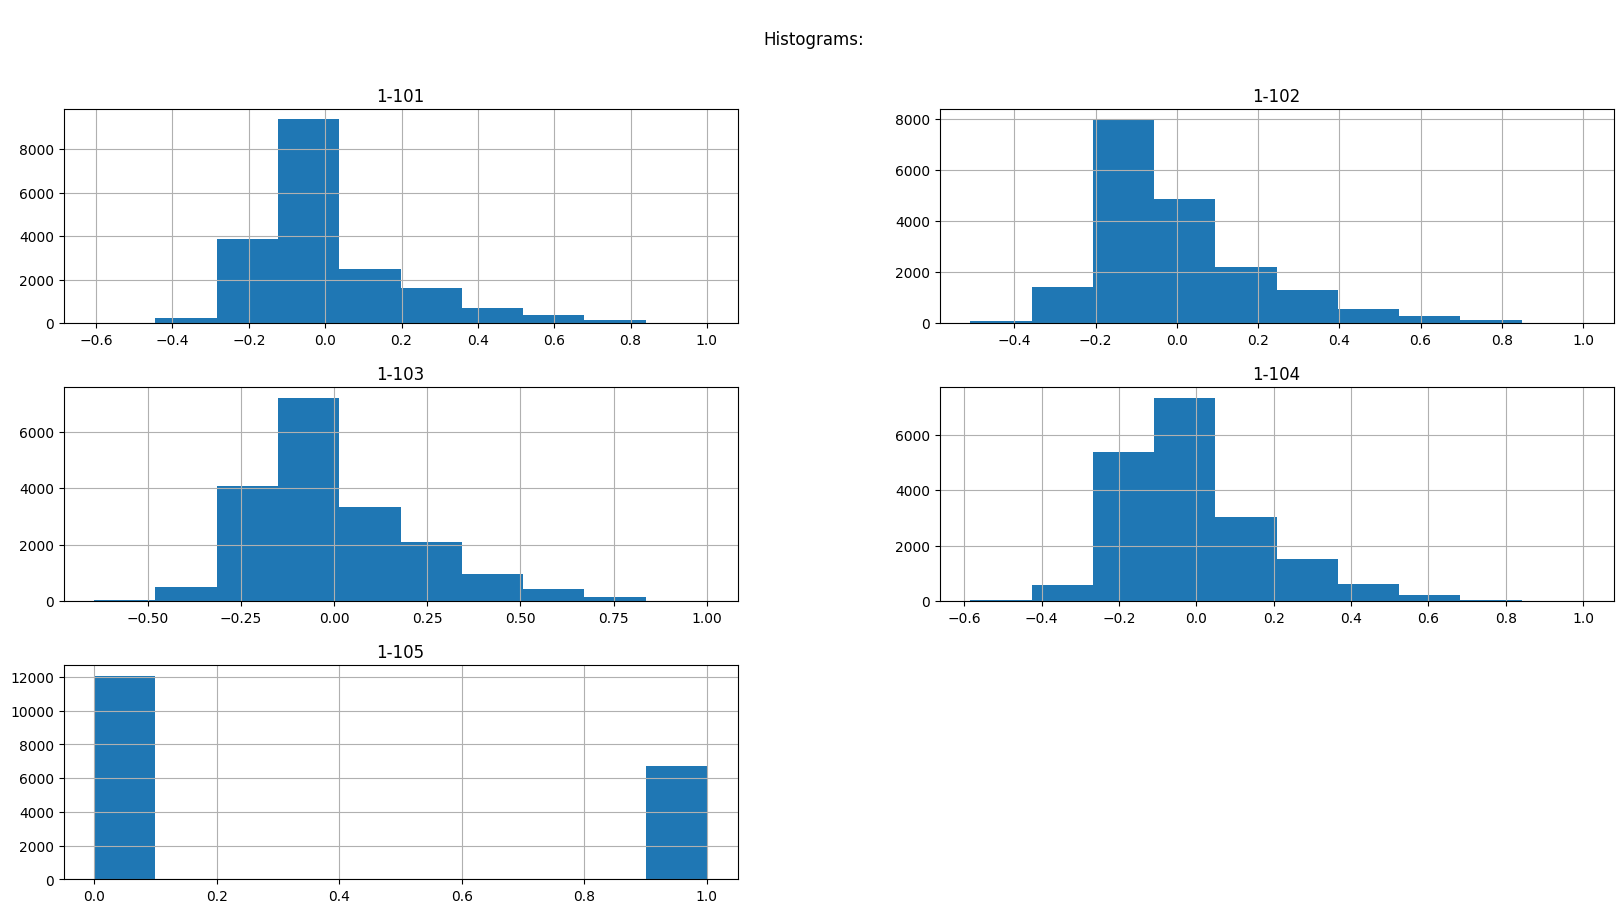


Scatter Plots:



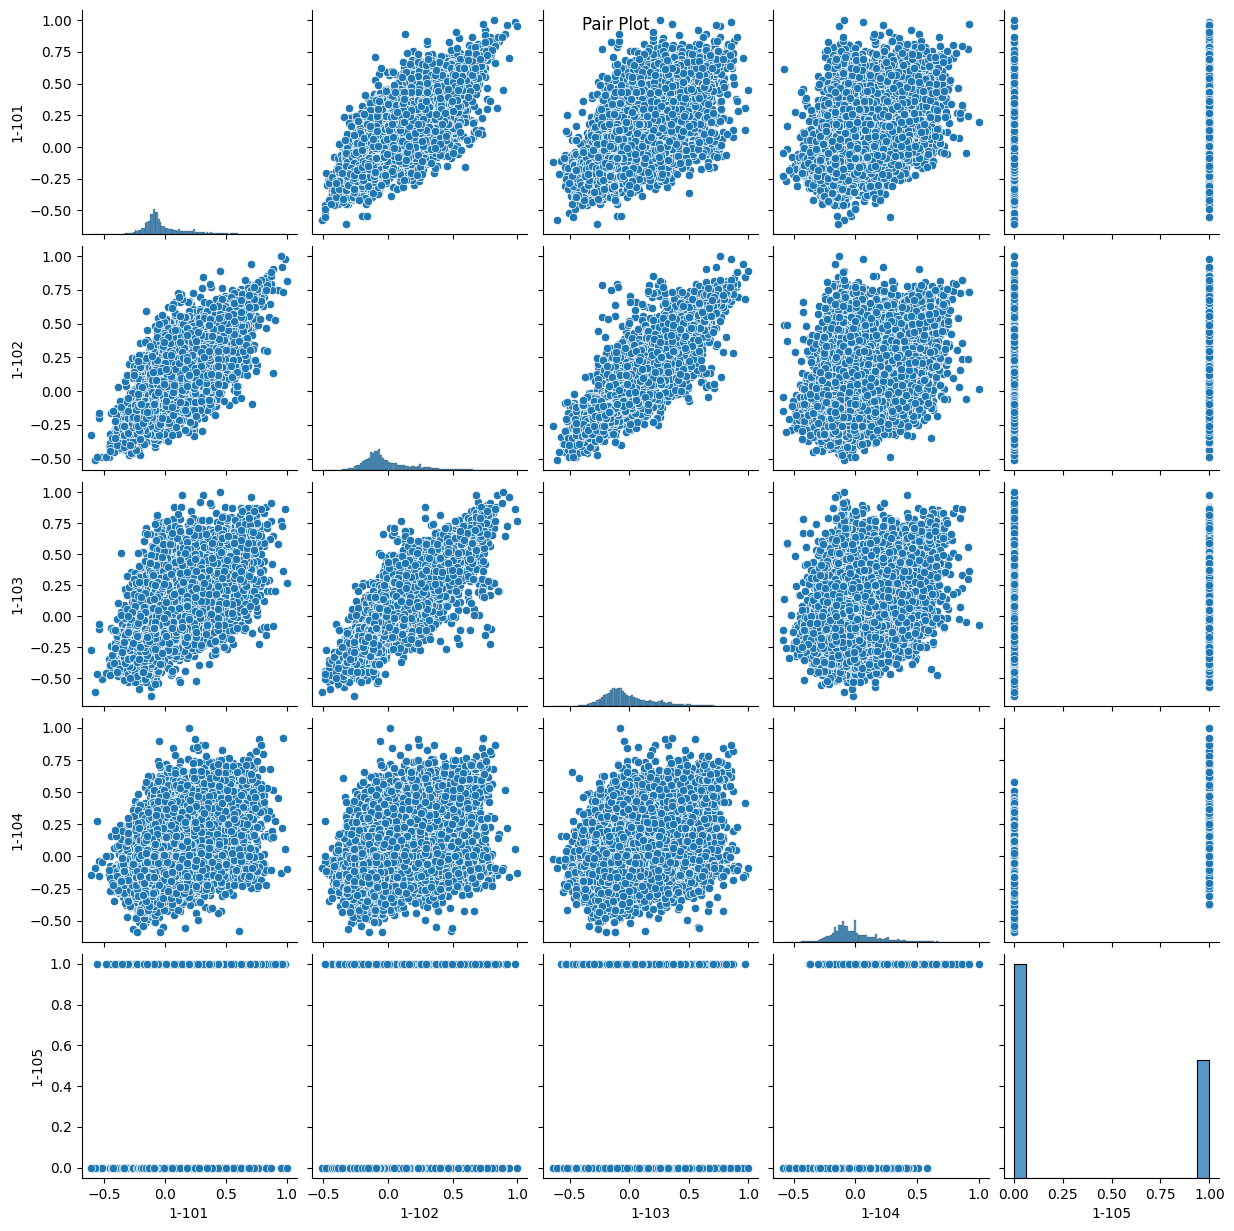

In [ ]:
import seaborn as sns
#Plot histograms
df.hist(figsize=(20,10))
plt.suptitle("\nHistograms:\n")
plt.show()

print("\nScatter Plots:\n")
for column in df.select_dtypes(include=['object']):
     plt.figure(figsize=(10, 6))
     sns.countplot(x=column, data=df)
     plt.title(f"Distribution of {column}")
     plt.xticks(rotation=45)
     plt.show()

sns.pairplot(df)
plt.suptitle("Pair Plot")
plt.show()